In [1]:
import glob
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "10"
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN

# Vicsek_bands

### Start and End

In [2]:
bands_paths = glob.glob("../plotting_data/bands/pos_ang2_*.npz")
bands_paths.sort()

bands_start = np.load(bands_paths[1])
bands_start_pos = bands_start["positions"]
bands_start_ang = bands_start["angles"]

bands_end = np.load(bands_paths[-1])
bands_end_pos = bands_end["positions"]
bands_end_ang = bands_end["angles"]
    
print(f"start positions length: {len(bands_start_pos)}")
print(f"start angles length: {len(bands_start_ang)}")
print(f"end positions length: {len(bands_end_pos)}")
print(f"end angles length: {len(bands_end_ang)}")

start positions length: 5000
start angles length: 5000
end positions length: 5000
end angles length: 5000


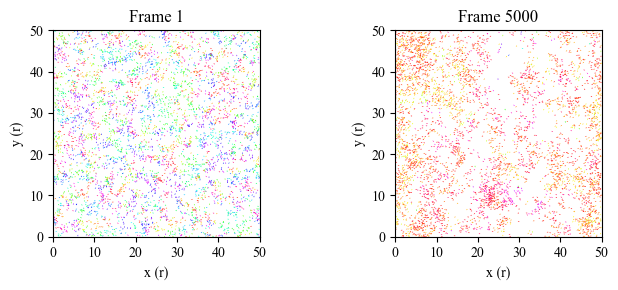

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7, 3))

ax1.set_aspect("equal")
qv1 = ax1.quiver(bands_start_pos[:,0], bands_start_pos[:,1], np.cos(bands_start_ang), np.sin(bands_start_ang), bands_start_ang, clim = [-np.pi, np.pi], cmap = "hsv")
qv1.set_offsets(bands_start_pos)
qv1.set_UVC(np.cos(bands_start_ang), np.sin(bands_start_ang), bands_start_ang)
ax1.set_title("Frame 1")
ax1.set_xlabel("x (r)")
ax1.set_ylabel("y (r)")
ax1.set_xticks(range(0, 51, 10))
ax1.set_yticks(range(0, 51, 10))
ax1.set_xlim(0, 50)
ax1.set_ylim(0, 50)

ax2.set_aspect("equal")
qv2 = ax2.quiver(bands_end_pos[:,0], bands_end_pos[:,1], np.cos(bands_end_ang), np.sin(bands_end_ang), bands_end_ang, clim = [-np.pi, np.pi], cmap = "hsv")
qv2.set_offsets(bands_end_pos)
qv2.set_UVC(np.cos(bands_end_ang), np.sin(bands_end_ang), bands_end_ang)
ax2.set_title("Frame 5000")
ax2.set_xlabel("x (r)")
ax2.set_ylabel("y (r)")
ax2.set_xticks(range(0, 51, 10))
ax2.set_yticks(range(0, 51, 10))
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 50)

plt.tight_layout()
plt.savefig("../report_figs/bands_frames.png", dpi = 300)
plt.show()

### Order Parameter

In [4]:
bands_order_param = {}
bands_steady_reached = {}
bands_steady_time = {}

for eta in range(1, 6):
    bands_order = np.load(f"../plotting_data/bands/order{eta}.npz")
    bands_order_param[eta] = bands_order["order"]
    bands_steady_reached[eta] = bands_order["steady_reached"]
    bands_steady_time[eta] = bands_order["steady_time"]
    
    if eta ==2:
        bands_order_param2 = bands_order_param[eta]
        bands_steady_reached2 = bands_steady_reached[eta]
        bands_steady_time2 = bands_steady_time[eta]
        
    print(f"eta: 0.{eta}")
    print(f"order parameter length: {len(bands_order_param[eta])}")

print(f"order parameter 2 length: {len(bands_order_param2)}")
    
time_step = 10

eta: 0.1
order parameter length: 500
eta: 0.2
order parameter length: 500
eta: 0.3
order parameter length: 500
eta: 0.4
order parameter length: 500
eta: 0.5
order parameter length: 500
order parameter 2 length: 500


<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/var/folders/sy/dfcv0pl97t54wq4tf148fgm40000gn/T/ipykernel_5831/1372909949.py:12: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel("$\phi$(t)")


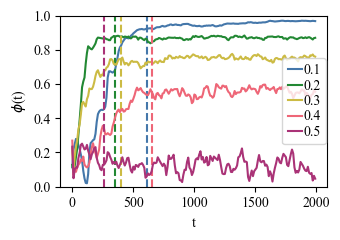

In [5]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

colors = {1: "#4477AA", 2: "#228833", 3: "#CCBB44", 4: "#EE6677", 5: "#AA3377"}

for eta in range(1, 6):
    times = np.arange(0, 2000, 10)
    order, = ax.plot(times, bands_order_param[eta][:200], label = f"0.{eta}", color = colors[eta])
    order_colour = order.get_color()
    if bands_steady_reached[eta] == True:
        ax.axvline(x = bands_steady_time[eta] * time_step, color = order_colour, linestyle = "--")
ax.set_xlabel("t")
ax.set_ylabel("$\phi$(t)")
ax.set_xticks(np.arange(0, 2001, 500))
ax.set_ylim(0, 1.0)
ax.legend(loc = "center right", labelspacing = 0.1, handlelength = 1.0, handletextpad = 0.1, borderaxespad = 0.1)
plt.tight_layout()
plt.savefig("../report_figs/bands_order.png", dpi = 300)
plt.show()

### Clustering

In [6]:
bands_num_clust = {}
bands_particle_clust = {}

for eta in range(1, 6):
    bands_clusters = np.load(f"../plotting_data/bands/clusters{eta}.npz")
    bands_num_clust[eta] = bands_clusters["num_clust"]
    bands_particle_clust[eta] = bands_clusters["particle_clust"]
    
    if eta == 2:
        bands_num_clust2 = bands_num_clust[eta]
        bands_particle_clust2 = bands_particle_clust[eta]
    
    print(f"eta: 0.{eta}")
    print(f"num clusters length: {len(bands_num_clust[eta])}")
    print(f"particles/cluster length: {len(bands_particle_clust[eta])}")
    
print(f"num clusters 2 length: {len(bands_num_clust2)}")
print(f"particles/cluster 2 length: {len(bands_particle_clust2)}")

eta: 0.1
num clusters length: 501
particles/cluster length: 501
eta: 0.2
num clusters length: 501
particles/cluster length: 501
eta: 0.3
num clusters length: 501
particles/cluster length: 501
eta: 0.4
num clusters length: 501
particles/cluster length: 501
eta: 0.5
num clusters length: 501
particles/cluster length: 501
num clusters 2 length: 501
particles/cluster 2 length: 501


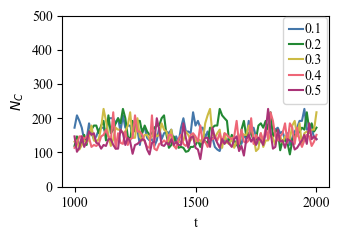

In [7]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

colors = {1: "#4477AA", 2: "#228833", 3: "#CCBB44", 4: "#EE6677", 5: "#AA3377"}

for eta in range(1, 6):
    time_scale = np.arange(1000, 2001, 10)
    ax.plot(time_scale, bands_particle_clust[eta][100:201], label = f"0.{eta}", color = colors[eta])
ax.set_xlabel("t")
ax.set_ylabel("$N_C$")
ax.set_xticks(np.arange(1000, 2001, 500))
ax.set_ylim(0, 500)
ax.legend(loc = "upper right", labelspacing = 0.1, handlelength = 1.0, handletextpad = 0.1, borderaxespad = 0.1)
plt.tight_layout()
plt.savefig("../report_figs/bands_clusters.png", dpi = 300)
plt.show()

### Average Angles

In [8]:
bands_avg_ang = {}

for eta in range(1, 6):
    bands_avg_angs = np.load(f"../plotting_data/bands/avg_ang{eta}.npz")
    bands_avg_ang[eta] = bands_avg_angs["angles"]
    
    print(f"eta: 0.{eta}")
    print(f"average angles length: {len(bands_avg_ang[eta])}")

time_step = 10


eta: 0.1
average angles length: 500
eta: 0.2
average angles length: 500
eta: 0.3
average angles length: 500
eta: 0.4
average angles length: 500
eta: 0.5
average angles length: 500


<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/var/folders/sy/dfcv0pl97t54wq4tf148fgm40000gn/T/ipykernel_5831/1379089015.py:4: SyntaxWarning: invalid escape sequence '\e'
  ax.plot(times, bands_avg_ang[eta], label = f"$\eta$=0.{eta}")


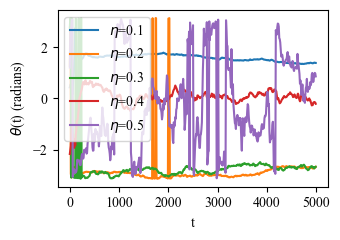

In [9]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))
for eta in range(1, 6):
    times = np.arange(0, 5000, 10)
    ax.plot(times, bands_avg_ang[eta], label = f"$\eta$=0.{eta}")
ax.set_xlabel("t")
ax.set_ylabel(r"$\theta$(t) (radians)")
ax.set_xticks(range(0, 5001, 1000))
ax.legend()
plt.tight_layout()
# plt.savefig("repulsive_alignment_14.png", dpi = 300)
plt.show()

### Histogram

In [10]:
bands_hist = {}
hist_normalised = {}

for eta in range(1, 6):
    bands_hists = np.load(f"../plotting_data/bands/hist{eta}.npz")
    bands_hist[eta] = bands_hists["hist"]
    hist_normalised[eta] = bands_hist[eta].T / sum(bands_hist[eta])
    
    print(f"eta: 0.{eta}")
    print(f"hist length: {len(bands_hist[eta])}")

L = 50

eta: 0.1
hist length: 50
eta: 0.2
hist length: 50
eta: 0.3
hist length: 50
eta: 0.4
hist length: 50
eta: 0.5
hist length: 50


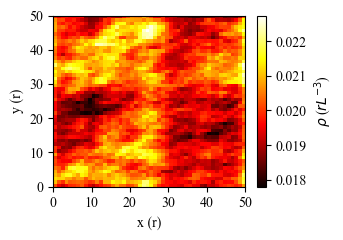

In [11]:
# for eta in range(1, 6):
fig, ax = plt.subplots(figsize = (3.5, 2.5))
cax = ax.imshow(hist_normalised[2], extent = [0, L, 0, L], origin = "lower", cmap = "hot", aspect = "auto")
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
fig.colorbar(cax, ax = ax, label = r"$\rho$ ($rL^{-3}$)")
plt.tight_layout()
# plt.savefig("repulsive_densitymap_14.png", dpi = 300)
plt.show()

# Vicsek_bands_city

### Start and End

In [12]:
city_paths = glob.glob("../plotting_data/bands_city/pos_ang*.npz")
city_paths.sort()

city_start = np.load(city_paths[5])
city_start_pos = city_start["positions"]
city_start_ang = city_start["angles"]

city_end = np.load(city_paths[-1])
city_end_pos = city_end["positions"]
city_end_ang = city_end["angles"]
    
city_barriers = np.load("../plotting_data/bands_city/barriers.npy")
boundary = 1
    
print(f"start positions length: {len(city_start_pos)}")
print(f"start angles length: {len(city_start_ang)}")
print(f"end positions length: {len(city_end_pos)}")
print(f"end angles length: {len(city_end_ang)}")
print(f"barriers:\n{city_barriers}")

start positions length: 5000
start angles length: 5000
end positions length: 5000
end angles length: 5000
barriers:
[[21 34 25 39]
 [25 32  7 13]
 [ 7 16  5 17]
 [ 8 16 27 39]
 [39 44 17 27]]


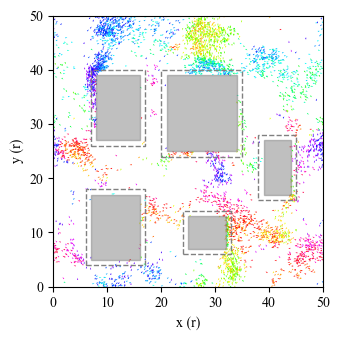

In [13]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7, 3))

# ax1.set_aspect("equal")
# qv1 = ax1.quiver(city_start_pos[:,0], city_start_pos[:,1], np.cos(city_start_ang), np.sin(city_start_ang), city_start_ang, clim = [-np.pi, np.pi], cmap = "hsv")
# qv1.set_offsets(city_start_pos)
# qv1.set_UVC(np.cos(city_start_ang), np.sin(city_start_ang), city_start_ang)
# for barrier_x_start, barrier_x_end, barrier_y_start, barrier_y_end in city_barriers:
#     ax1.add_patch(plt.Rectangle((barrier_x_start, barrier_y_start), barrier_x_end - barrier_x_start, barrier_y_end - barrier_y_start, color = "grey", alpha = 0.5))
#     ax1.add_patch(plt.Rectangle((barrier_x_start - boundary, barrier_y_start - boundary), (barrier_x_end + boundary) - (barrier_x_start - boundary), (barrier_y_end + boundary) - (barrier_y_start - boundary), edgecolor = "grey", fill = False))
# ax1.set_title("Frame 3")
# ax1.set_xlabel("x (r)")
# ax1.set_ylabel("y (r)")
# ax1.set_xticks(range(0, 51, 10))
# ax1.set_yticks(range(0, 51, 10))
# ax1.set_xlim(0, 50)
# ax1.set_ylim(0, 50)

# ax2.set_aspect("equal")

fig, ax2 = plt.subplots(figsize = (3.5, 3.5))
qv2 = ax2.quiver(city_end_pos[:,0], city_end_pos[:,1], np.cos(city_end_ang), np.sin(city_end_ang), city_end_ang, clim = [-np.pi, np.pi], cmap = "hsv")
qv2.set_offsets(city_end_pos)
qv2.set_UVC(np.cos(city_end_ang), np.sin(city_end_ang), city_end_ang)
for barrier_x_start, barrier_x_end, barrier_y_start, barrier_y_end in city_barriers:
    ax2.add_patch(plt.Rectangle((barrier_x_start, barrier_y_start), barrier_x_end - barrier_x_start, barrier_y_end - barrier_y_start, color = "grey", alpha = 0.5))
    ax2.add_patch(plt.Rectangle((barrier_x_start - boundary, barrier_y_start - boundary), (barrier_x_end + boundary) - (barrier_x_start - boundary), (barrier_y_end + boundary) - (barrier_y_start - boundary), edgecolor = "grey", fill = False, linestyle = "--"))
ax2.set_xlabel("x (r)")
ax2.set_ylabel("y (r)")
ax2.set_xticks(range(0, 51, 10))
ax2.set_yticks(range(0, 51, 10))
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 50)

plt.tight_layout()
plt.savefig("../report_figs/city_frames.png", dpi = 300)
plt.show()

### Order Parameter

In [14]:
city_order = np.load("../plotting_data/bands_city/order.npz")
city_order_param = city_order["order"]
city_steady_reached = city_order["steady_reached"]
city_steady_time = city_order["steady_time"]

time_step = 10
    
print(f"order parameter length: {len(city_order_param)}")

order parameter length: 500


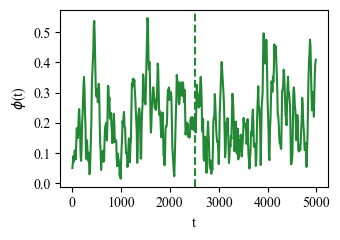

In [15]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))
times = np.arange(0, 5000, 10)
order, = ax.plot(times, city_order_param, color = "#228833")
order_colour = order.get_color()
if city_steady_reached == True:
    ax.axvline(x = city_steady_time * time_step, color = order_colour, linestyle = "--")
ax.set_xlabel("t")
ax.set_ylabel(r"$\phi$(t)")
ax.set_xticks(np.arange(0, 5001, 1000))
plt.tight_layout()
# plt.savefig("Poster_city_order.png", dpi = 300)
plt.show()

### Clustering

In [16]:
city_clusters = np.load("../plotting_data/bands_city/clusters.npz")
city_num_clust = city_clusters["num_clust"]
city_particle_clust = city_clusters["particle_clust"]
    
print(f"num clusters length: {len(city_num_clust)}")
print(f"particles/cluster length: {len(city_particle_clust)}")

num clusters length: 501
particles/cluster length: 501


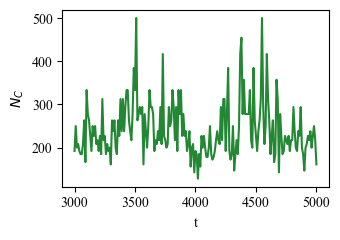

In [17]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))
time_scale = np.arange(3000, 5001, 10)
ax.plot(time_scale, city_particle_clust[300:], color = "#228833")
ax.set_xlabel("t")
ax.set_ylabel("$N_C$")
ax.set_xticks(np.arange(3000, 5001, 500))
plt.tight_layout()
# plt.savefig("Poster_city_clusters.png", dpi = 300)
plt.show()

### Flux and Stream

In [18]:
city_flow = np.load("../plotting_data/bands_city/flow.npz")
city_vx = city_flow["vx"]
city_vy = city_flow["vy"]
city_counts = city_flow["counts"]
city_vxedges = city_flow["vxedges"]
city_vyedges = city_flow["vyedges"]
    
print(f"vx length: {len(city_vx)}")
print(f"vy length: {len(city_vy)}")
print(f"counts length: {len(city_counts)}")
print(f"vxedges length: {len(city_vxedges)}")
print(f"vyedges length: {len(city_vyedges)}")

vx length: 50
vy length: 50
counts length: 50
vxedges length: 51
vyedges length: 51


In [19]:
avg_vx = np.zeros_like(city_vx) # empty array for average x velocity flux
avg_vy = np.zeros_like(city_vy)
avg_vx[city_counts > 0] = city_vx[city_counts > 0] / city_counts[city_counts > 0] # calculate average velocity flux where counts > 0
avg_vy[city_counts > 0] = city_vy[city_counts > 0] / city_counts[city_counts > 0]

X, Y = np.meshgrid(city_vxedges[:-1], city_vyedges[:-1])

# only plot inside the box (not the movement in and out of the edges of the box)
avg_vx_inner = avg_vx[1:-1, 1:-1]
avg_vy_inner = avg_vy[1:-1, 1:-1]

X_inner, Y_inner = np.meshgrid(city_vxedges[1:avg_vx_inner.shape[0]+1], city_vyedges[1:avg_vx_inner.shape[1]+1])

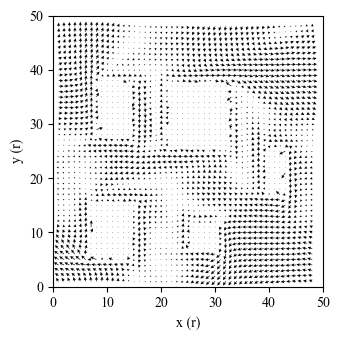

In [20]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))
ax.quiver(X_inner, Y_inner, avg_vx_inner.T, avg_vy_inner.T, scale = 20, headwidth = 5)
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
plt.tight_layout()
plt.savefig("../report_figs/city_flux.png", dpi = 300)
plt.show()

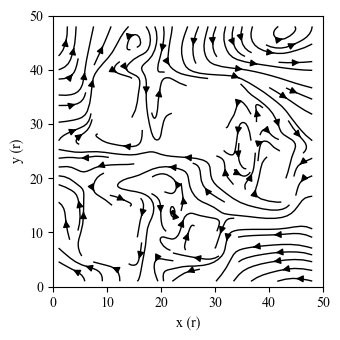

In [21]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))
ax.streamplot(X_inner, Y_inner, avg_vx_inner.T, avg_vy_inner.T, density = 1, linewidth = 1, color = "black")
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
plt.tight_layout()
plt.savefig("../report_figs/city_stream.png", dpi = 300)
plt.show()

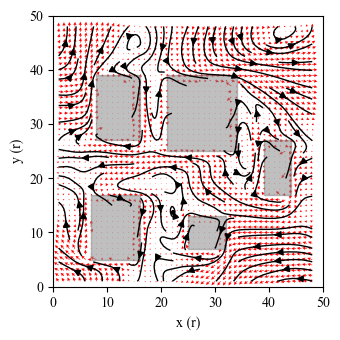

In [22]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))
ax.quiver(X_inner, Y_inner, avg_vx_inner.T, avg_vy_inner.T, scale = 20, headwidth = 5, color = "red")
ax.streamplot(X_inner, Y_inner, avg_vx_inner.T, avg_vy_inner.T, density = 1, linewidth = 1, color = "black")
for barrier_x_start, barrier_x_end, barrier_y_start, barrier_y_end in city_barriers:
    ax.add_patch(plt.Rectangle((barrier_x_start, barrier_y_start), barrier_x_end - barrier_x_start, barrier_y_end - barrier_y_start, color = "grey", alpha = 0.5))
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
plt.tight_layout()
plt.savefig("../report_figs/city_flow.png", dpi = 300)
plt.show()

### Average Angles

In [23]:
city_avg_angs = np.load("../plotting_data/bands_city/avg_ang.npz")
city_avg_ang = city_avg_angs["angles"]

time_step = 10
    
print(f"average angles length: {len(city_avg_ang)}")

average angles length: 500


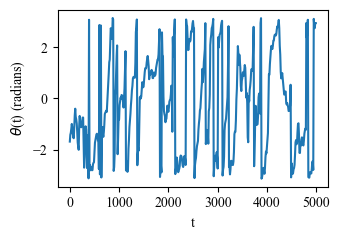

In [24]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))
times = np.arange(0, 5000, 10)
ax.plot(times, city_avg_ang)
ax.set_xlabel("t")
ax.set_ylabel(r"$\theta$(t) (radians)")
ax.set_xticks(range(0, 5001, 1000))
plt.tight_layout()
# plt.savefig("repulsive_alignment_14.png", dpi = 300)
plt.show()

### Histogram

In [25]:
city_hist = np.load("../plotting_data/bands_city/hist.npz")
city_hist = city_hist["hist"]

L = 50
# normalise the histogram to cartesian coordinates for plotting
hist_normalised = city_hist.T / sum(city_hist)
    
print(f"hist length: {len(city_hist)}")

hist length: 50


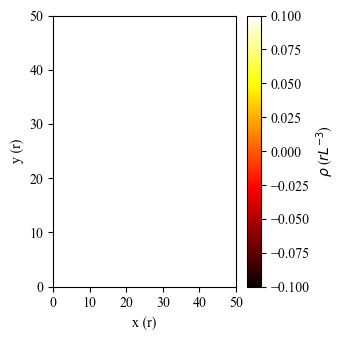

In [26]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))
cax = ax.imshow(hist_normalised, extent = [0, L, 0, L], origin = "lower", cmap = "hot", aspect = "auto")
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
fig.colorbar(cax, ax = ax, label = r"$\rho$ ($rL^{-3}$)")
plt.tight_layout()
# plt.savefig("repulsive_densitymap_14.png", dpi = 300)
plt.show()

# Vicsek_bands_repulsive

### Start and End

In [27]:
repulsive_paths = glob.glob("../plotting_data/bands_repulsive/pos_ang*.npz")
repulsive_paths.sort()

repulsive_start = np.load(repulsive_paths[5])
repulsive_start_pos = repulsive_start["positions"]
repulsive_start_ang = repulsive_start["angles"]

repulsive_end = np.load(repulsive_paths[-1])
repulsive_end_pos = repulsive_end["positions"]
repulsive_end_ang = repulsive_end["angles"]

barrier_x_start, barrier_x_end = 15, 35
barrier_y_start, barrier_y_end = 15, 35
boundary = 1
    
print(f"start positions length: {len(repulsive_start_pos)}")
print(f"start angles length: {len(repulsive_start_ang)}")
print(f"end positions length: {len(repulsive_end_pos)}")
print(f"end angles length: {len(repulsive_end_ang)}")

start positions length: 5000
start angles length: 5000
end positions length: 5000
end angles length: 5000


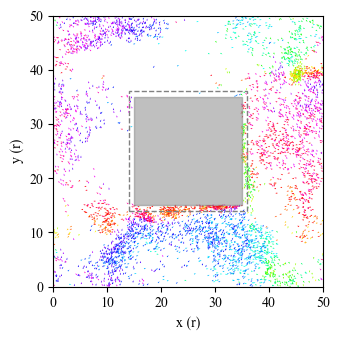

In [28]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7, 3))

# ax1.set_aspect("equal")
# qv1 = ax1.quiver(repulsive_start_pos[:,0], repulsive_start_pos[:,1], np.cos(repulsive_start_ang), np.sin(repulsive_start_ang), repulsive_start_ang, clim = [-np.pi, np.pi], cmap = "hsv")
# qv1.set_offsets(repulsive_start_pos)
# qv1.set_UVC(np.cos(repulsive_start_ang), np.sin(repulsive_start_ang), repulsive_start_ang)
# ax1.add_patch(plt.Rectangle((barrier_x_start, barrier_y_start), barrier_x_end - barrier_x_start, barrier_y_end - barrier_y_start, color = "grey", alpha = 0.5))
# ax1.add_patch(plt.Rectangle((barrier_x_start - boundary, barrier_y_start - boundary), (barrier_x_end + boundary) - (barrier_x_start - boundary), (barrier_y_end + boundary) - (barrier_y_start - boundary), edgecolor = "grey", fill = False))
# ax1.set_title("Frame 3")
# ax1.set_xlabel("x (r)")
# ax1.set_ylabel("y (r)")
# ax1.set_xticks(range(0, 51, 10))
# ax1.set_yticks(range(0, 51, 10))
# ax1.set_xlim(0, 50)
# ax1.set_ylim(0, 50)

# ax2.set_aspect("equal")

fig, ax2 = plt.subplots(figsize = (3.5, 3.5))
qv2 = ax2.quiver(repulsive_end_pos[:,0], repulsive_end_pos[:,1], np.cos(repulsive_end_ang), np.sin(repulsive_end_ang), repulsive_end_ang, clim = [-np.pi, np.pi], cmap = "hsv")
qv2.set_offsets(repulsive_end_pos)
qv2.set_UVC(np.cos(repulsive_end_ang), np.sin(repulsive_end_ang), repulsive_end_ang)
ax2.add_patch(plt.Rectangle((barrier_x_start, barrier_y_start), barrier_x_end - barrier_x_start, barrier_y_end - barrier_y_start, color = "grey", alpha = 0.5))
ax2.add_patch(plt.Rectangle((barrier_x_start - boundary, barrier_y_start - boundary), (barrier_x_end + boundary) - (barrier_x_start - boundary), (barrier_y_end + boundary) - (barrier_y_start - boundary), edgecolor = "grey", fill = False, linestyle = "--"))
ax2.set_xlabel("x (r)")
ax2.set_ylabel("y (r)")
ax2.set_xticks(range(0, 51, 10))
ax2.set_yticks(range(0, 51, 10))
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 50)

plt.tight_layout()
plt.savefig("../report_figs/repulsive_frames.png", dpi = 300)
plt.show()

### Order Parameter

In [29]:
repulsive_order = np.load("../plotting_data/bands_repulsive/order.npz")
repulsive_order_param = repulsive_order["order"]
repulsive_steady_reached = repulsive_order["steady_reached"]
repulsive_steady_time = repulsive_order["steady_time"]

time_step = 10
    
print(f"order parameter length: {len(repulsive_order_param)}")

order parameter length: 500


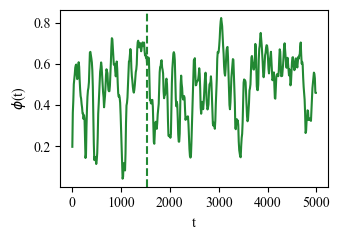

In [30]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))
times = np.arange(0, 5000, 10)
order, = ax.plot(times, repulsive_order_param, color = "#228833")
order_colour = order.get_color()
if repulsive_steady_reached == True:
    ax.axvline(x = repulsive_steady_time * time_step, color = order_colour, linestyle = "--")
ax.set_xlabel("t")
ax.set_ylabel(r"$\phi$(t)")
ax.set_xticks(np.arange(0, 5001, 1000))
plt.tight_layout()
# plt.savefig("Poster_city_order.png", dpi = 300)
plt.show()

### Clustering

In [31]:
repulsive_clusters = np.load("../plotting_data/bands_repulsive/clusters.npz")
repulsive_num_clust = repulsive_clusters["num_clust"]
repulsive_particle_clust = repulsive_clusters["particle_clust"]
    
print(f"num clusters length: {len(repulsive_num_clust)}")
print(f"particles/cluster length: {len(repulsive_particle_clust)}")

num clusters length: 501
particles/cluster length: 501


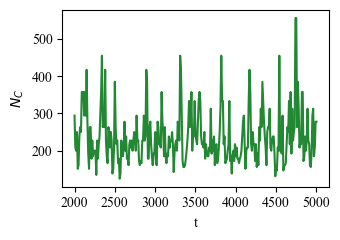

In [32]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))
time_scale = np.arange(2000, 5001, 10)
ax.plot(time_scale, repulsive_particle_clust[200:], color = "#228833")
ax.set_xlabel("t")
ax.set_ylabel("$N_C$")
ax.set_xticks(np.arange(2000, 5001, 500))
plt.tight_layout()
# plt.savefig("Poster_city_clusters.png", dpi = 300)
plt.show()

### Flux and Stream

In [33]:
repulsive_flow = np.load("../plotting_data/bands_repulsive/flow.npz")
repulsive_vx = repulsive_flow["vx"]
repulsive_vy = repulsive_flow["vy"]
repulsive_counts = repulsive_flow["counts"]
repulsive_vxedges = repulsive_flow["vxedges"]
repulsive_vyedges = repulsive_flow["vyedges"]
    
print(f"vx length: {len(repulsive_vx)}")
print(f"vy length: {len(repulsive_vy)}")
print(f"counts length: {len(repulsive_counts)}")
print(f"vxedges length: {len(repulsive_vxedges)}")
print(f"vyedges length: {len(repulsive_vyedges)}")

vx length: 50
vy length: 50
counts length: 50
vxedges length: 51
vyedges length: 51


In [34]:
avg_vx = np.zeros_like(repulsive_vx) # empty array for average x velocity flux
avg_vy = np.zeros_like(repulsive_vy)
avg_vx[repulsive_counts > 0] = repulsive_vx[repulsive_counts > 0] / repulsive_counts[repulsive_counts > 0] # calculate average velocity flux where counts > 0
avg_vy[repulsive_counts > 0] = repulsive_vy[repulsive_counts > 0] / repulsive_counts[repulsive_counts > 0]

X, Y = np.meshgrid(repulsive_vxedges[:-1], repulsive_vyedges[:-1])

# only plot inside the box (not the movement in and out of the edges of the box)
avg_vx_inner = avg_vx[1:-1, 1:-1]
avg_vy_inner = avg_vy[1:-1, 1:-1]

X_inner, Y_inner = np.meshgrid(repulsive_vxedges[1:avg_vx_inner.shape[0]+1], repulsive_vyedges[1:avg_vx_inner.shape[1]+1])

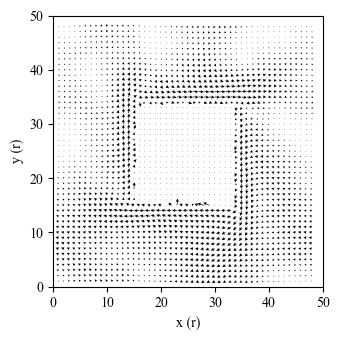

In [35]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))
ax.quiver(X_inner, Y_inner, avg_vx_inner.T, avg_vy_inner.T, scale = 20, headwidth = 5)
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
plt.tight_layout()
plt.savefig("../report_figs/repulsive_flux.png", dpi = 300)
plt.show()

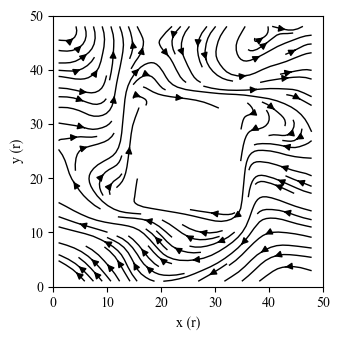

In [36]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))
ax.streamplot(X_inner, Y_inner, avg_vx_inner.T, avg_vy_inner.T, density = 1, linewidth = 1, color = "black")
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
plt.tight_layout()
plt.savefig("../report_figs/repulsive_stream.png", dpi = 300)
plt.show()

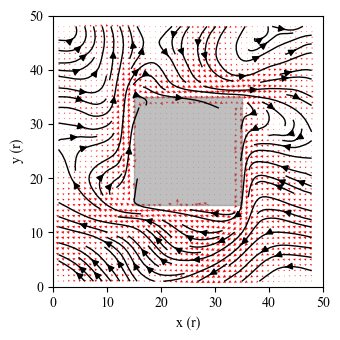

In [37]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))
ax.quiver(X_inner, Y_inner, avg_vx_inner.T, avg_vy_inner.T, scale = 20, headwidth = 5, color = "red")
ax.streamplot(X_inner, Y_inner, avg_vx_inner.T, avg_vy_inner.T, density = 1, linewidth = 1, color = "black")
ax.add_patch(plt.Rectangle((barrier_x_start, barrier_y_start), barrier_x_end - barrier_x_start, barrier_y_end - barrier_y_start, color = "grey", alpha = 0.5))
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
plt.tight_layout()
plt.savefig("../report_figs/repulsive_flow.png", dpi = 300)
plt.show()

### Average Angles

In [38]:
repulsive_avg_angs = np.load("../plotting_data/bands_repulsive/avg_ang.npz")
repulsive_avg_ang = repulsive_avg_angs["angles"]

time_step = 10
    
print(f"average angles length: {len(repulsive_avg_ang)}")

average angles length: 500


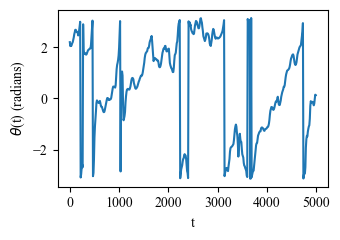

In [39]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))
times = np.arange(0, 5000, 10)
ax.plot(times, repulsive_avg_ang)
ax.set_xlabel("t")
ax.set_ylabel(r"$\theta$(t) (radians)")
ax.set_xticks(range(0, 5001, 1000))
plt.tight_layout()
# plt.savefig("repulsive_alignment_14.png", dpi = 300)
plt.show()

### Histogram

In [40]:
repulsive_hist = np.load("../plotting_data/bands_repulsive/hist.npz")
repulsive_hist = repulsive_hist["hist"]

L = 50
# normalise the histogram to cartesian coordinates for plotting
hist_normalised = repulsive_hist.T / sum(repulsive_hist)
    
print(f"hist length: {len(repulsive_hist)}")

hist length: 50


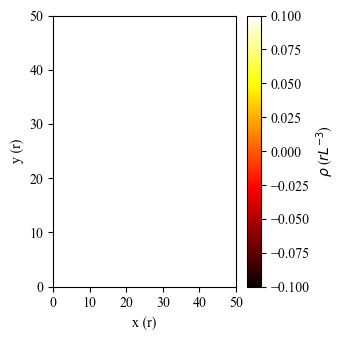

In [41]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))
cax = ax.imshow(hist_normalised, extent = [0, L, 0, L], origin = "lower", cmap = "hot", aspect = "auto")
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
fig.colorbar(cax, ax = ax, label = r"$\rho$ ($rL^{-3}$)")
plt.tight_layout()
# plt.savefig("repulsive_densitymap_14.png", dpi = 300)
plt.show()

# Vicsek_bands_attractive

### Start and End

In [42]:
attractive_paths = glob.glob("../plotting_data/bands_attractive/pos_ang*.npz")
attractive_paths.sort()

attractive_start = np.load(attractive_paths[5])
attractive_start_pos = attractive_start["positions"]
attractive_start_ang = attractive_start["angles"]

attractive_end = np.load(attractive_paths[-1])
attractive_end_pos = attractive_end["positions"]
attractive_end_ang = attractive_end["angles"]

barrier_x_start, barrier_x_end = 15, 35
barrier_y_start, barrier_y_end = 15, 35
    
print(f"start positions length: {len(attractive_start_pos)}")
print(f"start angles length: {len(attractive_start_ang)}")
print(f"end positions length: {len(attractive_end_pos)}")
print(f"end angles length: {len(attractive_end_ang)}")

start positions length: 5000
start angles length: 5000
end positions length: 5000
end angles length: 5000


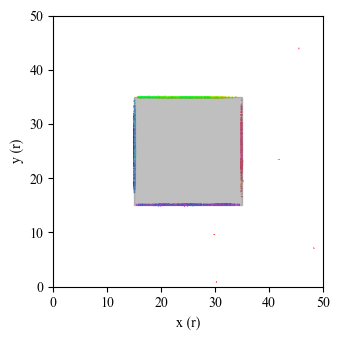

In [43]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7, 3))

# ax1.set_aspect("equal")
# qv1 = ax1.quiver(attractive_start_pos[:,0], attractive_start_pos[:,1], np.cos(attractive_start_ang), np.sin(attractive_start_ang), attractive_start_ang, clim = [-np.pi, np.pi], cmap = "hsv")
# qv1.set_offsets(attractive_start_pos)
# qv1.set_UVC(np.cos(attractive_start_ang), np.sin(attractive_start_ang), attractive_start_ang)
# ax1.add_patch(plt.Rectangle((barrier_x_start, barrier_y_start), barrier_x_end - barrier_x_start, barrier_y_end - barrier_y_start, color = "grey", alpha = 0.5))
# ax1.add_patch(plt.Rectangle((barrier_x_start - boundary, barrier_y_start - boundary), (barrier_x_end + boundary) - (barrier_x_start - boundary), (barrier_y_end + boundary) - (barrier_y_start - boundary), edgecolor = "grey", fill = False))
# ax1.set_title("Frame 3")
# ax1.set_xlabel("x (r)")
# ax1.set_ylabel("y (r)")
# ax1.set_xticks(range(0, 51, 10))
# ax1.set_yticks(range(0, 51, 10))
# ax1.set_xlim(0, 50)
# ax1.set_ylim(0, 50)

# ax2.set_aspect("equal")

fig, ax2 = plt.subplots(figsize = (3.5, 3.5))
qv2 = ax2.quiver(attractive_end_pos[:,0], attractive_end_pos[:,1], np.cos(attractive_end_ang), np.sin(attractive_end_ang), attractive_end_ang, clim = [-np.pi, np.pi], cmap = "hsv")
qv2.set_offsets(attractive_end_pos)
qv2.set_UVC(np.cos(attractive_end_ang), np.sin(attractive_end_ang), attractive_end_ang)
ax2.add_patch(plt.Rectangle((barrier_x_start, barrier_y_start), barrier_x_end - barrier_x_start, barrier_y_end - barrier_y_start, color = "grey", alpha = 0.5))
ax2.set_xlabel("x (r)")
ax2.set_ylabel("y (r)")
ax2.set_xticks(range(0, 51, 10))
ax2.set_yticks(range(0, 51, 10))
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 50)

plt.tight_layout()
plt.savefig("../report_figs/attractive_frames.png", dpi = 300)
plt.show()

### Flux and stream

In [44]:
attractive_flow = np.load("../plotting_data/bands_attractive/flow.npz")
attractive_vx = attractive_flow["vx"]
attractive_vy = attractive_flow["vy"]
attractive_counts = attractive_flow["counts"]
attractive_vxedges = attractive_flow["vxedges"]
attractive_vyedges = attractive_flow["vyedges"]
    
print(f"vx length: {len(attractive_vx)}")
print(f"vy length: {len(attractive_vy)}")
print(f"counts length: {len(attractive_counts)}")
print(f"vxedges length: {len(attractive_vxedges)}")
print(f"vyedges length: {len(attractive_vyedges)}")

vx length: 50
vy length: 50
counts length: 50
vxedges length: 51
vyedges length: 51


In [45]:
avg_vx = np.zeros_like(attractive_vx) # empty array for average x velocity flux
avg_vy = np.zeros_like(attractive_vy)
avg_vx[attractive_counts > 0] = attractive_vx[attractive_counts > 0] / attractive_counts[attractive_counts > 0] # calculate average velocity flux where counts > 0
avg_vy[attractive_counts > 0] = attractive_vy[attractive_counts > 0] / attractive_counts[attractive_counts > 0]

X, Y = np.meshgrid(attractive_vxedges[:-1], attractive_vyedges[:-1])

# only plot inside the box (not the movement in and out of the edges of the box)
avg_vx_inner = avg_vx[1:-1, 1:-1]
avg_vy_inner = avg_vy[1:-1, 1:-1]

X_inner, Y_inner = np.meshgrid(attractive_vxedges[1:avg_vx_inner.shape[0]+1], attractive_vyedges[1:avg_vx_inner.shape[1]+1])

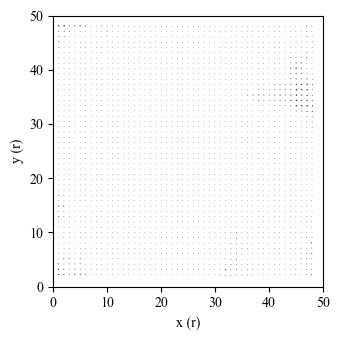

In [46]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))
ax.quiver(X_inner, Y_inner, avg_vx_inner.T, avg_vy_inner.T, scale = 20, headwidth = 5)
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
plt.tight_layout()
plt.savefig("../report_figs/attractive_flux.png", dpi = 300)
plt.show()

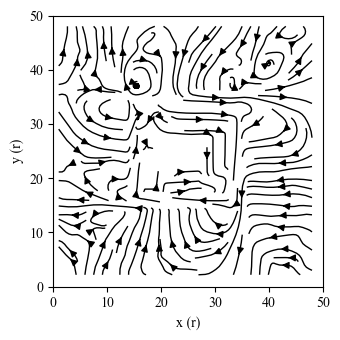

In [47]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))
ax.streamplot(X_inner, Y_inner, avg_vx_inner.T, avg_vy_inner.T, density = 1, linewidth = 1, color = "black")
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
plt.tight_layout()
plt.savefig("../report_figs/attractive_stream.png", dpi = 300)
plt.show()

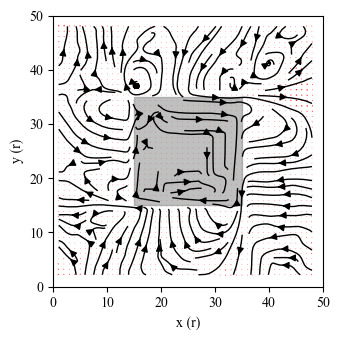

In [48]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))
ax.quiver(X_inner, Y_inner, avg_vx_inner.T, avg_vy_inner.T, scale = 20, headwidth = 5, color = "red")
ax.streamplot(X_inner, Y_inner, avg_vx_inner.T, avg_vy_inner.T, density = 1, linewidth = 1, color = "black")
ax.add_patch(plt.Rectangle((barrier_x_start, barrier_y_start), barrier_x_end - barrier_x_start, barrier_y_end - barrier_y_start, color = "grey", alpha = 0.5))
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
plt.tight_layout()
plt.savefig("../report_figs/attractive_flow.png", dpi = 300)
plt.show()

# Combined Plots

### Order Parameter

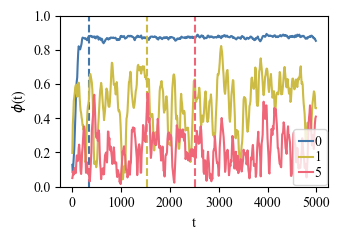

In [49]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

times = np.arange(0, 5000, 10)

bands_order2, = ax.plot(times, bands_order_param2, label = "0", color = "#4477AA")
bands_colour2 = bands_order2.get_color()
if bands_steady_reached2 == True:
    ax.axvline(x = bands_steady_time2 * time_step, color = bands_colour2, linestyle = "--")

repulsive_order, = ax.plot(times, repulsive_order_param, label = "1", color = "#CCBB44")
repulsive_colour = repulsive_order.get_color()
if repulsive_steady_reached == True:
    ax.axvline(x = repulsive_steady_time * time_step, color = repulsive_colour, linestyle = "--")
    
city_order, = ax.plot(times, city_order_param, label = "5", color = "#EE6677")
city_colour = city_order.get_color()
if city_steady_reached == True:
    ax.axvline(x = city_steady_time * time_step, color = city_colour, linestyle = "--")

ax.legend(loc = "lower right", labelspacing = 0.1, handlelength = 1.0, handletextpad = 0.1, borderaxespad = 0.1)
ax.set_xlabel("t")
ax.set_ylabel(r"$\phi$(t)")
ax.set_xticks(np.arange(0, 5001, 1000))
ax.set_ylim(0.0, 1.0)
plt.tight_layout()
plt.savefig("../report_figs/all_order.png", dpi = 300)
plt.show()

### Clustering

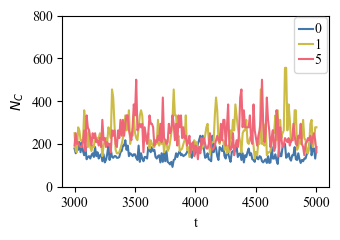

In [50]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

time_scale = np.arange(3000, 5001, 10)
ax.plot(time_scale, bands_particle_clust2[300:], label = "0", color = "#4477AA")
ax.plot(time_scale, repulsive_particle_clust[300:], label = "1", color = "#CCBB44")
ax.plot(time_scale, city_particle_clust[300:], label = "5", color = "#EE6677")

ax.legend(loc = "upper right", labelspacing = 0.1, handlelength = 1.0, handletextpad = 0.1, borderaxespad = 0.1)
ax.set_xlabel("t")
ax.set_ylabel("$N_C$")
ax.set_xticks(np.arange(3000, 5001, 500))
ax.set_ylim(0, 800)
plt.tight_layout()
plt.savefig("../report_figs/all_clusters.png", dpi = 300)
plt.show()

In [51]:
def clusters(positions, L, threshold):
    # taking into account periodic boundary conditions
    total = 0
    for d in range(positions.shape[1]):
        pd = pdist(positions[:, d].reshape(positions.shape[0],1))
        pd[pd > L * 0.5] -= L
        total += pd ** 2
    total = np.sqrt(total)
    square = squareform(total)
    
    # clustering
    clustering = DBSCAN(eps = threshold, metric = "precomputed").fit(square)
    labels = clustering.labels_ # assign cluster labels to each point (points labelled -1 are noise)
    unique_labels = set(labels) # unique clustering labels
    
    # exclude noise in number of clusters calculation
    if -1 in labels:
        num_clusters = len(unique_labels) - 1
    else:
        num_clusters = len(unique_labels)
        
    # average number of particles per cluster
    if num_clusters > 0:
        cluster_particles = len(positions) / num_clusters
    else:
        cluster_particles = 0
        
    return labels, num_clusters, cluster_particles

In [52]:
L = 50
cluster_threshold = 1.0
barrier_x_start, barrier_x_end = 15, 35
barrier_y_start, barrier_y_end = 15, 35

labels, num_clusters, cluster_particles = clusters(bands_end_pos, L, cluster_threshold)
bands_labels = set(labels)
bands_colors = plt.cm.Spectral(np.linspace(0, 1, len(bands_labels)))

labels, num_clusters, cluster_particles = clusters(repulsive_end_pos, L, cluster_threshold)
repulsive_labels = set(labels)
repulsive_colors = plt.cm.Spectral(np.linspace(0, 1, len(repulsive_labels)))

labels, num_clusters, cluster_particles = clusters(city_end_pos, L, cluster_threshold)
city_labels = set(labels)
city_colors = plt.cm.Spectral(np.linspace(0, 1, len(city_labels)))

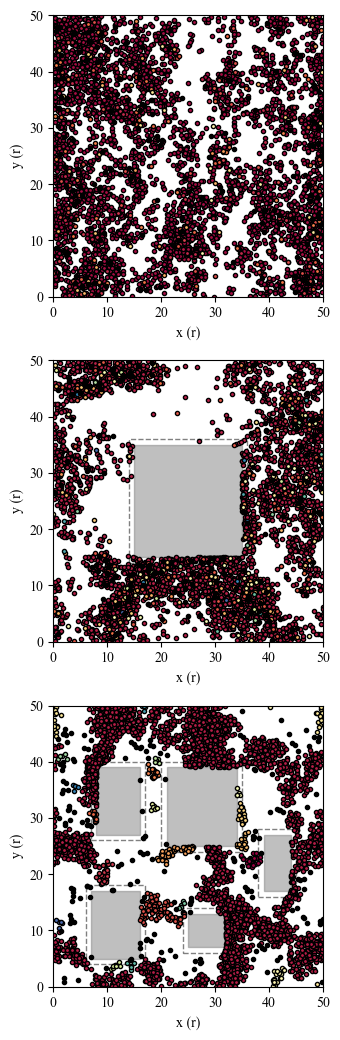

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (3.5, 10.5))

for k, col in zip(bands_labels, bands_colors):
    if k == -1:
        col = "k"
        
    class_member_mask = (labels == k)
    
    xy = bands_end_pos[class_member_mask]
    ax1.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = col, markeredgecolor = "k", markersize = 3)

ax1.set_xlabel("x (r)")
ax1.set_ylabel("y (r)")
ax1.set_xticks(range(0, 51, 10))
ax1.set_yticks(range(0, 51, 10))
ax1.set_xlim(0, 50)
ax1.set_ylim(0, 50)

ax2.add_patch(plt.Rectangle((barrier_x_start, barrier_y_start), barrier_x_end - barrier_x_start, barrier_y_end - barrier_y_start, color = "grey", alpha = 0.5))
ax2.add_patch(plt.Rectangle((barrier_x_start - boundary, barrier_y_start - boundary), (barrier_x_end + boundary) - (barrier_x_start - boundary), (barrier_y_end + boundary) - (barrier_y_start - boundary), edgecolor = "grey", fill = False, linestyle = "--"))

for k, col in zip(repulsive_labels, repulsive_colors):
    if k == -1:
        col = "k"
        
    class_member_mask = (labels == k)
    
    xy = repulsive_end_pos[class_member_mask]
    ax2.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = col, markeredgecolor = "k", markersize = 3)

ax2.set_xlabel("x (r)")
ax2.set_ylabel("y (r)")
ax2.set_xticks(range(0, 51, 10))
ax2.set_yticks(range(0, 51, 10))
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 50)

for barrier_x_start, barrier_x_end, barrier_y_start, barrier_y_end in city_barriers:
    ax3.add_patch(plt.Rectangle((barrier_x_start, barrier_y_start), barrier_x_end - barrier_x_start, barrier_y_end - barrier_y_start, color = "grey", alpha = 0.5))
    ax3.add_patch(plt.Rectangle((barrier_x_start - boundary, barrier_y_start - boundary), (barrier_x_end + boundary) - (barrier_x_start - boundary), (barrier_y_end + boundary) - (barrier_y_start - boundary), edgecolor = "grey", fill = False, linestyle = "--"))

for k, col in zip(city_labels, city_colors):
    if k == -1:
        col = "k"
        
    class_member_mask = (labels == k)
    
    xy = city_end_pos[class_member_mask]
    ax3.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = col, markeredgecolor = "k", markersize = 3)

ax3.set_xlabel("x (r)")
ax3.set_ylabel("y (r)")
ax3.set_xticks(range(0, 51, 10))
ax3.set_yticks(range(0, 51, 10))
ax3.set_xlim(0, 50)
ax3.set_ylim(0, 50)

plt.tight_layout()
# plt.savefig("city_clustervis.png", dpi = 300)   
plt.show()